In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score,r2_score
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
milk=pd.read_csv('Milk Quality.csv')

In [ ]:
milk.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
milk.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [ ]:
print(milk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


In [ ]:
milk.shape

(1059, 8)

In [ ]:
milk.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
print(Counter(milk['Grade']))

Counter({'low': 429, 'medium': 374, 'high': 256})


In [ ]:
row_dup=milk[milk.duplicated()]

In [ ]:
col_dup=milk.columns[milk.columns.duplicated()]

In [ ]:
row_dup

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [ ]:
col_dup

Index([], dtype='object')

In [ ]:
milk.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [ ]:
milk.shape

(1059, 8)

#**To check Outliers**




In [ ]:
num_df=milk.select_dtypes(include ="number")
cat_df=milk.select_dtypes(include ="object")

In [ ]:
print("Numerical columns are")
num_cols=num_df.columns.tolist()
print(num_cols)

print("Categorical columns are")
cat_cols=cat_df.columns.tolist()
print(cat_cols)

Numerical columns are
['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
Categorical columns are
['Grade']


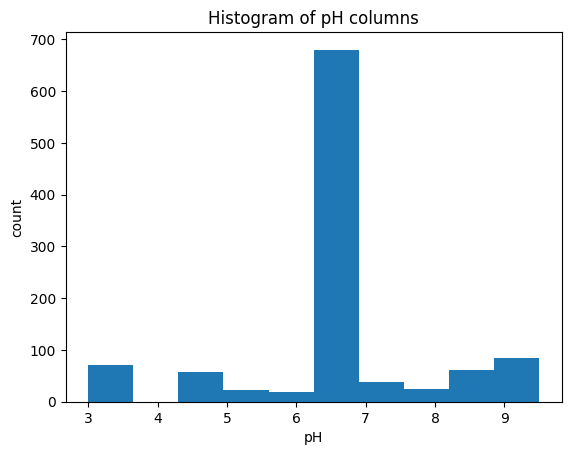

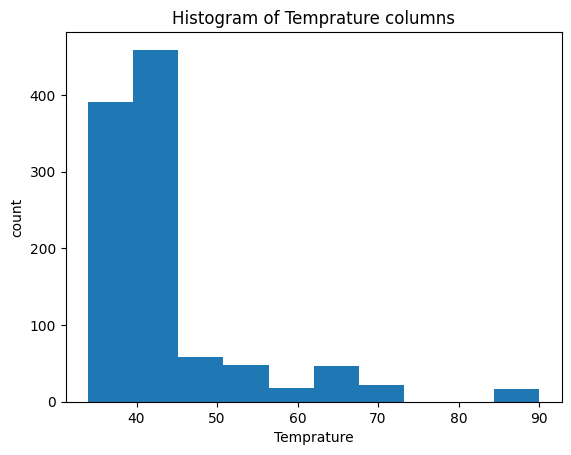

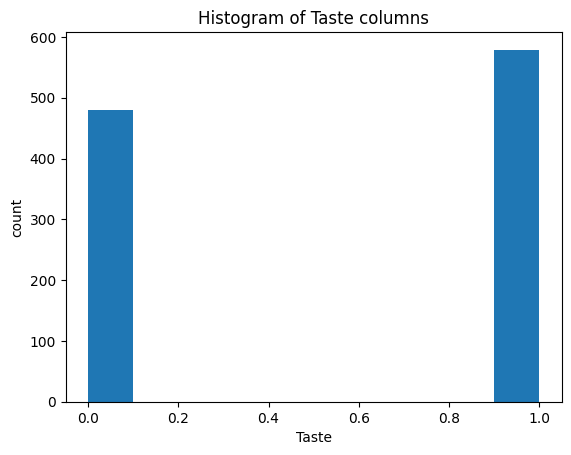

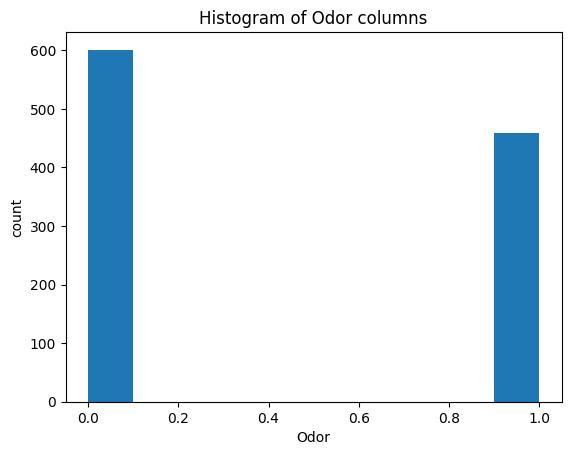

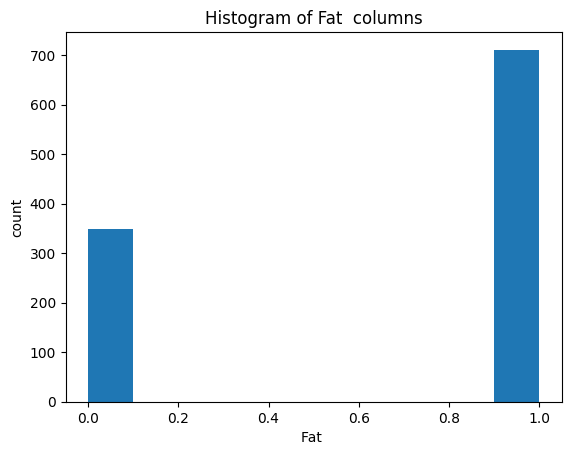

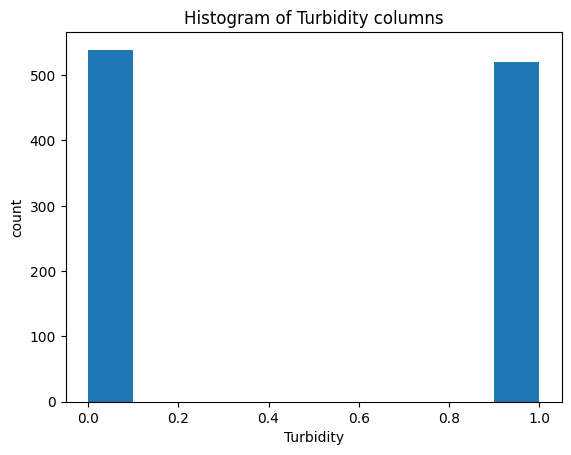

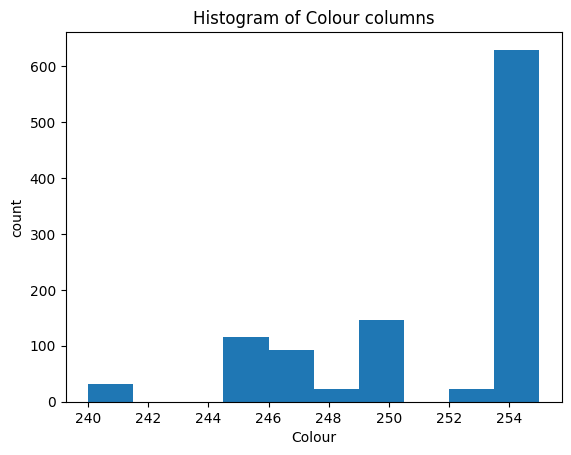

In [ ]:
for col in num_cols:
  plt.hist(num_df[col])
  plt.title("Histogram of {} columns".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [ ]:
for col in num_cols:
  num_df[col]=num_df[col].fillna(num_df[col].median())

In [ ]:
num_df.isna().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0


In [ ]:
for col in cat_cols:
  cat_df[col]=cat_df[col].fillna(cat_df[col].mode()[0])

In [ ]:
cat_df.isna().sum()

,0
Grade,0


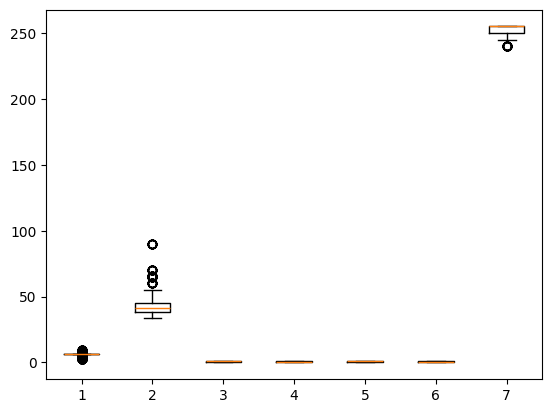

In [ ]:
plt.boxplot(num_df)
plt.show()

To remove Outliers If any

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [ ]:
for col in num_cols:
  num_df[col]=remove_outliers(num_df,col)

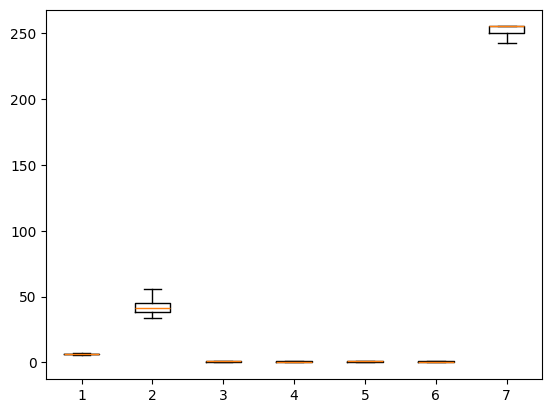

In [ ]:
plt.boxplot(num_df)
plt.show()

In [ ]:
milk['Grade'].value_counts()

,count
Grade,
low,429
medium,374
high,256


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Create a StandardScaler object
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)
scaled_df = pd.DataFrame(scaled_data, columns=num_cols, index=num_df.index)
final_df = pd.concat([scaled_df, cat_df], axis=1)

In [ ]:
scaled_df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,-0.209585,-1.227463,0.910503,-0.872962,0.699608,-0.982217,0.506489
1,-0.209585,-1.071293,-1.098294,1.145525,-1.429372,1.018105,0.263457
2,1.540178,1.974028,0.910503,1.145525,0.699608,1.018105,-1.437768
3,1.540178,-1.383633,0.910503,1.145525,-1.429372,1.018105,0.749521
4,-0.209585,-0.915123,-1.098294,-0.872962,-1.429372,-0.982217,0.749521
...,...,...,...,...,...,...,...
1054,0.059609,0.334240,0.910503,1.145525,-1.429372,-0.982217,-1.194736
1055,0.059609,-0.758952,0.910503,-0.872962,0.699608,-0.982217,0.749521
1056,-1.690155,-0.446612,0.910503,1.145525,0.699608,1.018105,0.749521
1057,0.328804,0.021899,0.910503,-0.872962,0.699608,-0.982217,-0.465639


In [ ]:
final_df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,-0.209585,-1.227463,0.910503,-0.872962,0.699608,-0.982217,0.506489,high
1,-0.209585,-1.071293,-1.098294,1.145525,-1.429372,1.018105,0.263457,high
2,1.540178,1.974028,0.910503,1.145525,0.699608,1.018105,-1.437768,low
3,1.540178,-1.383633,0.910503,1.145525,-1.429372,1.018105,0.749521,low
4,-0.209585,-0.915123,-1.098294,-0.872962,-1.429372,-0.982217,0.749521,medium
...,...,...,...,...,...,...,...,...
1054,0.059609,0.334240,0.910503,1.145525,-1.429372,-0.982217,-1.194736,medium
1055,0.059609,-0.758952,0.910503,-0.872962,0.699608,-0.982217,0.749521,high
1056,-1.690155,-0.446612,0.910503,1.145525,0.699608,1.018105,0.749521,low
1057,0.328804,0.021899,0.910503,-0.872962,0.699608,-0.982217,-0.465639,high


#**To Separate Features and Labels**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X = final_df.drop('Grade', axis=1)
y = final_df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1059, 7)
Shape of y: (1059,)


In [ ]:
milk.shape

(1059, 8)

4 fold

In [ ]:
from sklearn.model_selection import KFold, train_test_split

kf = KFold(n_splits=4, shuffle=True, random_state=42)  # Create a KFold object

accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = LogisticRegression()  # Create and train your model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)  # Make predictions on the validation set

    accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy
    accuracy_scores.append(accuracy)

average_accuracy = np.mean(accuracy_scores)  # Average accuracy across all folds
print(f"Average Accuracy: {average_accuracy}")

Average Accuracy: 0.8064322469982848


#**Classification Model**

LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7924528301886793


KNN model

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Accuracy: 0.9905660377358491
              precision    recall  f1-score   support

        high       0.98      1.00      0.99        48
         low       1.00      0.97      0.99        78
      medium       0.99      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



SVM

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8726415094339622
              precision    recall  f1-score   support

        high       0.75      0.92      0.82        48
         low       0.90      0.83      0.87        78
      medium       0.94      0.88      0.91        86

    accuracy                           0.87       212
   macro avg       0.86      0.88      0.87       212
weighted avg       0.88      0.87      0.87       212



Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8207547169811321
              precision    recall  f1-score   support

        high       0.59      1.00      0.74        48
         low       0.95      0.94      0.94        78
      medium       1.00      0.62      0.76        86

    accuracy                           0.82       212
   macro avg       0.84      0.85      0.81       212
weighted avg       0.89      0.82      0.82       212



Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        48
         low       1.00      1.00      1.00        78
      medium       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        48
         low       1.00      1.00      1.00        78
      medium       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



BEST MODEL DECISION TREE & RANDOM FOREST

#**DEPLOYMENT**

In [ ]:
import pickle


In [ ]:
filename="knn_model.pkl"
with open(filename,"wb") as file:
  pickle.dump(knn,file)

In [ ]:
with open(filename,"rb") as f:

  model=pickle.load(f)

In [ ]:
pred=model.predict(np.array([[1,9,1,7,0,0,0]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pred[0]

'low'